### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras

Using TensorFlow backend.


Input variables:

# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
bank = pd.read_csv('C:/Users/prade/Downloads/bank-additional/bank-additional-full.csv',sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#Dropping unknowns
for i in list(bank):
    bank = bank[~bank[i].isin(['unknown'])]
    

In [21]:
bank.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

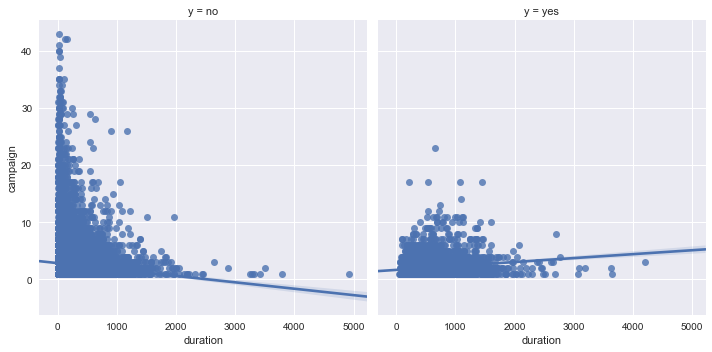

In [6]:
sns.lmplot(x='duration',y='campaign',data=bank,col='y')

In [6]:
bank['job'].value_counts()

admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

In [15]:
bank.dropna(how='any',inplace=True)

# correlation Matrix 

In [76]:
corr = bank.corr()

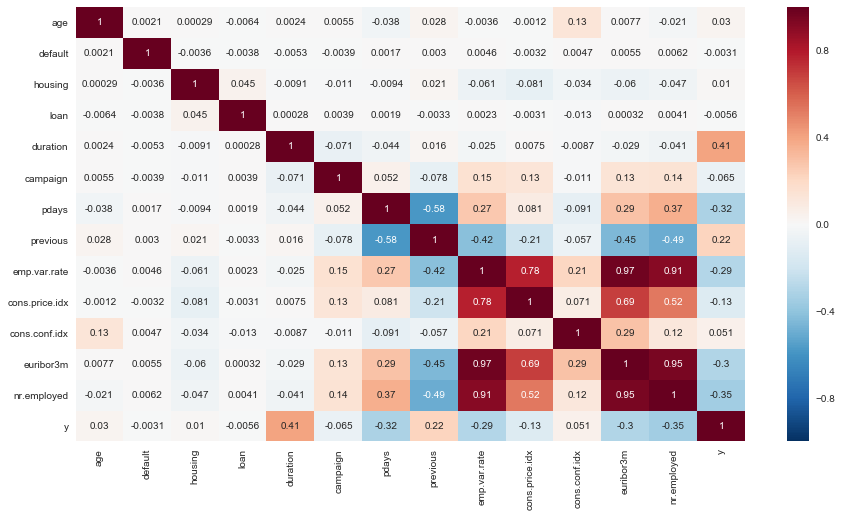

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [7]:
bank.drop(['contact', 'month', 'day_of_week','poutcome'],axis=1,inplace=True)

In [8]:
bank.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


# Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
X = bank.iloc[:,0:13].values
y = bank.iloc[:,13].values

In [59]:
y

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [12]:
label_def = LabelEncoder()
label_hou = LabelEncoder()
label_loan = LabelEncoder()
label_y = LabelEncoder()

In [13]:
X[:,1] = label_def.fit_transform(X[:,1])
X[:,2] = label_hou.fit_transform(X[:,2])
X[:,3] = label_loan.fit_transform(X[:,3])
y = label_y.fit_transform(y)


In [14]:
X[0:20,0:15]

array([[56, 3, 1, 0, 'no', 'no', 'no', 261, 1, 999, 0, 1.1, 93.994],
       [37, 7, 1, 3, 'no', 'yes', 'no', 226, 1, 999, 0, 1.1, 93.994],
       [40, 0, 1, 1, 'no', 'no', 'no', 151, 1, 999, 0, 1.1, 93.994],
       [56, 7, 1, 3, 'no', 'no', 'yes', 307, 1, 999, 0, 1.1, 93.994],
       [59, 0, 1, 5, 'no', 'no', 'no', 139, 1, 999, 0, 1.1, 93.994],
       [24, 9, 2, 5, 'no', 'yes', 'no', 380, 1, 999, 0, 1.1, 93.994],
       [25, 7, 2, 3, 'no', 'yes', 'no', 50, 1, 999, 0, 1.1, 93.994],
       [25, 7, 2, 3, 'no', 'yes', 'no', 222, 1, 999, 0, 1.1, 93.994],
       [29, 1, 2, 3, 'no', 'no', 'yes', 137, 1, 999, 0, 1.1, 93.994],
       [57, 3, 0, 0, 'no', 'yes', 'no', 293, 1, 999, 0, 1.1, 93.994],
       [35, 1, 1, 1, 'no', 'yes', 'no', 146, 1, 999, 0, 1.1, 93.994],
       [35, 1, 1, 1, 'no', 'yes', 'no', 312, 1, 999, 0, 1.1, 93.994],
       [50, 1, 1, 2, 'no', 'yes', 'yes', 353, 1, 999, 0, 1.1, 93.994],
       [30, 10, 1, 3, 'no', 'no', 'no', 38, 1, 999, 0, 1.1, 93.994],
       [55, 5, 2, 3, 'no

In [88]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\prade\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [96]:
X_train[0:10,0:15]

array([[-0.29816576, -0.0090558 ,  0.92216632, -0.43280889, -0.45725129,
        -0.55600853,  0.21346848, -0.37415281,  0.9153567 ,  0.67389306,
        -0.44299946,  0.84690948,  0.89678299],
       [-0.10512417, -0.0090558 ,  0.92216632, -0.43280889,  2.26832159,
        -0.55600853,  0.21346848, -0.37415281,  0.9153567 , -0.13496114,
         0.93145548,  0.84859652,  0.89678299],
       [ 1.14964618, -0.0090558 ,  0.92216632, -0.43280889, -0.83067017,
        -0.19120926,  0.21346848,  1.53217412, -1.06939574, -1.07521148,
        -1.17187708, -1.19778639, -0.81554096],
       [ 1.53572937, -0.0090558 , -1.08440309, -0.43280889, -0.48034937,
        -0.55600853,  0.21346848, -0.37415281,  0.9153567 ,  0.67389306,
        -0.44299946,  0.84634713,  0.89678299],
       [ 0.37747981, -0.0090558 , -1.08440309, -0.43280889, -0.11078016,
        -0.55600853,  0.21346848, -0.37415281, -1.06939574, -0.76463877,
        -1.35930276, -1.11962007, -0.81554096],
       [-1.84249849, -0.009055

In [97]:
from keras.models import Sequential
from keras.layers import Dense

# Layers

In [98]:
classifier = Sequential()

In [99]:
classifier.add(Dense(output_dim=7, init = 'uniform',activation='relu', input_dim=13))
classifier.add(Dense(output_dim=7, init = 'uniform',activation='relu'))
classifier.add(Dense(output_dim=1, init = 'uniform',activation='sigmoid'))

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=7, input_dim=13)`
  if __name__ == '__main__':
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=7)`
  from ipykernel import kernelapp as app
C:\Users\prade\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`
  app.launch_new_instance()


In [100]:
classifier.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

# Training the Model

In [101]:
classifier.fit(X_train,y_train,batch_size=10, epochs=100)

Epoch 1/100
24390/24390 [==============================] - 4s - loss: 0.2602 - acc: 0.8847     
Epoch 2/100
24390/24390 [==============================] - 2s - loss: 0.2228 - acc: 0.9014     
Epoch 3/100
24390/24390 [==============================] - 2s - loss: 0.2201 - acc: 0.9025     
Epoch 4/100
24390/24390 [==============================] - 2s - loss: 0.2188 - acc: 0.9029     
Epoch 5/100
24390/24390 [==============================] - 2s - loss: 0.2180 - acc: 0.9018     
Epoch 6/100
24390/24390 [==============================] - 2s - loss: 0.2172 - acc: 0.9035     
Epoch 7/100
24390/24390 [==============================] - 2s - loss: 0.2167 - acc: 0.9034     
Epoch 8/100
24390/24390 [==============================] - 2s - loss: 0.2166 - acc: 0.9036     
Epoch 9/100
24390/24390 [==============================] - 2s - loss: 0.2159 - acc: 0.9028     
Epoch 10/100
24390/24390 [==============================] - 2s - loss: 0.2158 - acc: 0.9032     
Epoch 11/100
24390/24390 [=============

In [110]:
predict = classifier.predict(X_test)

In [111]:
predictNN = (predict>0.5)

In [113]:
print(confusion_matrix(y_test,predictNN),'\n')
print(classification_report(y_test,predictNN))

[[5073  231]
 [ 395  399]] 

             precision    recall  f1-score   support

          0       0.93      0.96      0.94      5304
          1       0.63      0.50      0.56       794

avg / total       0.89      0.90      0.89      6098



In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [123]:
from sklearn import metrics

In [108]:
rfc = RandomForestClassifier(n_estimators=300)

In [109]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [114]:
predictRF = rfc.predict(X_test)

In [117]:
print(confusion_matrix(y_test,predictRF))
print(classification_report(y_test,predictRF))

[[5021  283]
 [ 375  419]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      5304
          1       0.60      0.53      0.56       794

avg / total       0.89      0.89      0.89      6098



In [118]:
knn = KNeighborsClassifier(n_neighbors=12)

In [119]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [120]:
predictk = knn.predict(X_test)

In [121]:
print(confusion_matrix(y_test,predictk),'\n')
print(classification_report(y_test,predictk))

[[5134  170]
 [ 504  290]] 

             precision    recall  f1-score   support

          0       0.91      0.97      0.94      5304
          1       0.63      0.37      0.46       794

avg / total       0.87      0.89      0.88      6098



In [109]:
print(knn.predict_proba(X_test))

[[ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.33333333  0.66666667]
 ..., 
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]]


In [124]:
print(metrics.accuracy_score(y_test, predictk))

0.889471958019


In [125]:
k_range = range(1,30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores,'\n')

[0.86339783535585435, 0.87914070186946536, 0.88274844211216796, 0.88471630042636928, 0.89029189898327321, 0.88930796982617255, 0.88947195801902268, 0.89094785175467361, 0.891439816333224, 0.8896359462118727, 0.89160380452607413, 0.88947195801902268, 0.89225975729747453, 0.89357166284027545, 0.89422761561167596, 0.8932436864545753, 0.89275172187602492, 0.89061987536897347, 0.89225975729747453, 0.88930796982617255, 0.88979993440472283, 0.88914398163332242, 0.89209576910462451, 0.88914398163332242, 0.89209576910462451, 0.89029189898327321, 0.89225975729747453, 0.89160380452607413, 0.89242374549032466] 



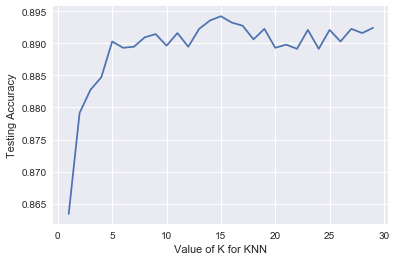

In [126]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')